In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
from wordcloud import WordCloud
from pylab import *
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
summer = pd.read_csv("../output/summer.csv")

In [4]:
MedalSummary = pd.read_csv("../output/medal_summary.csv")
MedalSummary['Percentage_of_Medals']= MedalSummary['Percentage_of_Medals'].round(3)
MedalSummary.sample(10)

,Year,NOC,Percentage_of_Medals,Host_Country
3304,1960,GUI,0.0,0
2658,1948,MDA,0.0,0
4484,1980,LAT,0.0,0
5746,2000,YMD,0.0,0
2418,1936,LES,0.0,0
2645,1948,LBA,0.0,0
3065,1956,GBS,0.0,0
6627,2016,SSD,0.0,0
3174,1956,SOM,0.0,0
1075,1908,PAN,0.0,0


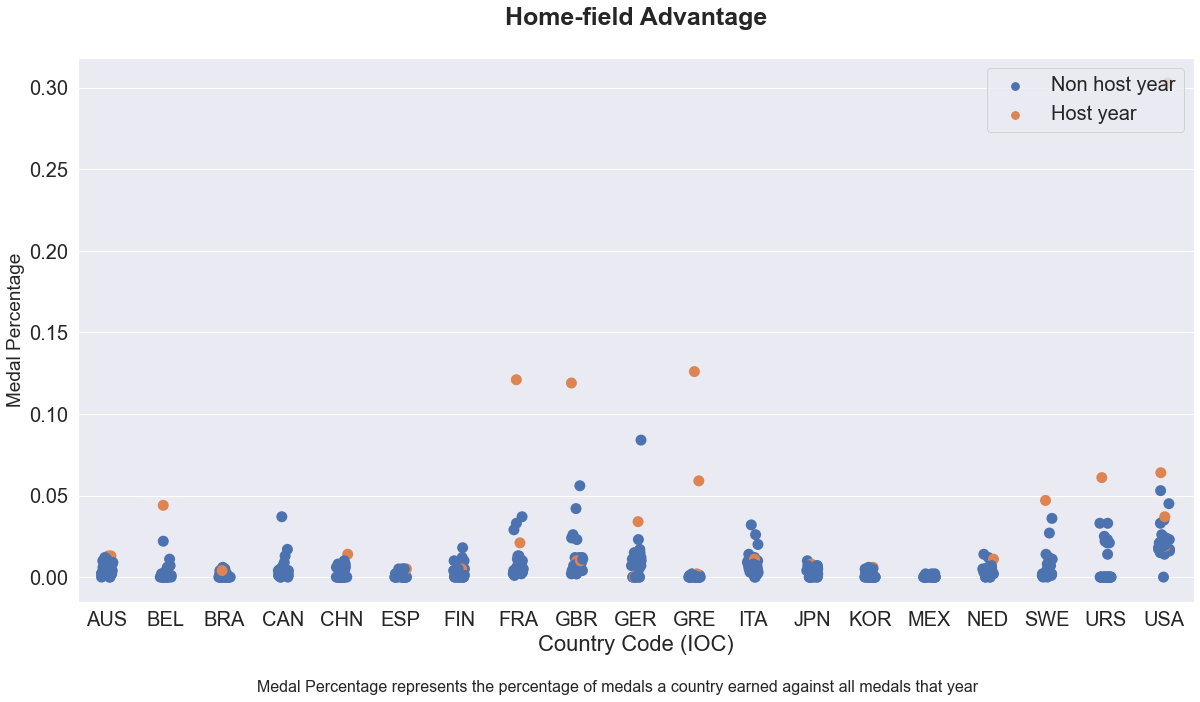

In [5]:
sns.set()
plt.rcParams.update({'font.size': 18})
HostCountries_list = ["GRE", "FRA", "USA", "GBR", "SWE", "BEL", "NED", "GER","FIN", "AUS", "ITA", "JPN", "MEX", "CAN", "URS", "KOR", "ESP", "CHN", "BRA"]
plt.figure(figsize=(20,10))
ax = sns.stripplot(x="NOC", y="Percentage_of_Medals",hue="Host_Country", data=MedalSummary[MedalSummary.NOC.isin(HostCountries_list)], size=11)
plt.xlabel("Country Code (IOC)", size=22)
plt.ylabel("Medal Percentage", size=19)
plt.xticks(size=20)
plt.yticks(size=20)
L = plt.legend(loc=1,prop={'size': 20})
L.get_texts()[0].set_text('Non host year')
L.get_texts()[1].set_text('Host year')
plt.title('Home-field Advantage', size=25, weight="bold", y=1.05)
# center text
txt="Medal Percentage represents the percentage of medals a country earned against all medals that year"
plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=16)
plt.savefig('../output/vis/g-2-7.png')

In [ ]:
sns.set()
plt.figure(figsize=(25, 18))
ax = sns.boxplot(x="NOC", y="Percentage_of_Medals", data=MedalSummary[MedalSummary.NOC.isin(HostCountries_list)],whis=np.inf, color="white")
ax = sns.swarmplot(x="NOC", y="Percentage_of_Medals",hue="Host_Country", data=MedalSummary[MedalSummary.NOC.isin(HostCountries_list)], size=12)
plt.xlabel("Country Code (IOC)", size=25, labelpad=10)
plt.ylabel("Medal Percentage", size=29)
plt.xticks(size=20)
plt.yticks(size=20)
L = plt.legend(loc=2,prop={'size': 25})
L.get_texts()[0].set_text('Non host year')
L.get_texts()[1].set_text('Host year')
plt.title('Home-field Advantage', size=36, weight="bold", y=1.06)
# center text
txt="Medal Percentage represents the percentage of medals a country earned against all medals that year"
plt.figtext(0.5, 0.04, txt, wrap=True, horizontalalignment='center', fontsize=25)
plt.savefig('../output/vis//g-2-8.png', bbox_inches='tight')

In [ ]:
HostCountries_list=["GRE", "FRA", "USA", "GBR", "SWE", "BEL", "NED", "GER","FIN", "AUS", "ITA", "JPN", "MEX", "CAN", "URS", "KOR", "ESP", "CHN", "BRA"]
HostCountries_Name=['Greece', 'France', 'United States', 'Greate Britain', 'Sweden', 'Belgium', 'Netherlands', 'Germany',
                   'Finland', 'Australia', 'Italy', 'Japan', 'Mexico', 'Canada', 'Soviet Union', 'South Korea', 
                   'Spain', 'China', 'Brazil']
plt.figure(figsize=(40,50))
for i,c in enumerate(HostCountries_list,1):
    plt.subplot(5, 4, i)
    sns.kdeplot(data = MedalSummary[MedalSummary.NOC == c]["Percentage_of_Medals"],shade=True,legend=False)
    plt.title(HostCountries_Name[i-1], size=25,weight="bold")
    plt.ylabel("Density", size=25)
    plt.xlabel("Medal Percentage", size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    for h in MedalSummary[(MedalSummary.Host_Country == 1) & (MedalSummary.NOC == c)]["Percentage_of_Medals"]:
        plt.annotate('',xy=(h, 0),xytext=(0.030, 70),textcoords='offset pixels',
                horizontalalignment='center',
                verticalalignment='bottom',arrowprops=dict(shrink=0.001, width=3,color="red",alpha=0.6))
        plt.subplots_adjust(wspace=None, hspace=0.3)

fig = plt.figure()
fig.suptitle("Home-Field Advantage", fontsize = 30)

plt.savefig('../output/vis//g-2-9.png')

In [ ]:
medalEfficiency = pd.read_csv("../output/medal_efficiency.csv")

In [ ]:
trace = go.Choropleth(
            locations = medalEfficiency['ISO'],
            locationmode='ISO-3',
            z = medalEfficiency['MedalRate'],
            text = medalEfficiency['CountryName'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Medal Efficiency',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    height = 660,
    title = 'Medal efficiency of Olympic countries',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)

figEfficiency = dict( data=data, layout=layout )
iplot(figEfficiency)

In [ ]:
plot(figEfficiency,
     include_plotlyjs=False,
     output_type='div')

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
sports_list=[]
summer_data=summer.reset_index()
for i in range(len(summer_data)): 
    sports_list.append(summer_data.loc[i, "Sport"])
sports=" ".join(sports_list)
sports_no = dict(Counter(sports_list))

In [ ]:
plt.figure(figsize=(150,60))
plt.xlabel('Sports', size = 150)
plt.ylabel('Times', size = 150)
plt.bar(range(len(sports_no)), list(sports_no.values()), align='center')
plt.xticks(range(len(sports_no)), list(sports_no.keys()))
plt.title('Sports Participants', size=180, weight="bold")
plt.show()

In [ ]:
cloud = WordCloud(collocations=False).generate(sports)
#All participants
np.random.seed(42)
plt.figure(figsize=(25,30))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ranking Sports by Number of Athletes", size=30, weight="bold", y=1.05)
plt.savefig('../output/vis//g-4-2.png')